In [1]:
%matplotlib inline
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
txt="""
0	4.017
0.125	3.895
0.25	3.777
0.375	3.664
0.5	3.555
0.625	3.45
0.75	3.35
0.875	3.254
1	3.163
1.125	3.076
1.25	2.993
1.375	2.915
1.5	2.841
1.625	2.771
1.75	2.706
1.875	2.645
2	2.589
2.125	2.537
2.25	2.489
2.375	2.446
2.5	2.407
2.625	2.372
2.75	2.342
2.875	2.316
3	2.295
3.125	2.278
3.25	2.265
3.375	2.257
3.5	2.253
3.625	2.253
3.75	2.258
3.875	2.267
4	2.281
4.125	2.299
4.25	2.321
4.375	2.348
4.5	2.379
4.625	2.414
4.75	2.451
4.875	2.49
5	2.532
5.125	2.576
5.25	2.621
5.375	2.67
5.5	2.72
5.625	2.772
5.75	2.827
5.875	2.884
6	2.943
6.125	3.004
6.25	3.068
6.375	3.133
6.5	3.201
6.625	3.271
6.75	3.343
6.875	3.418
7	3.494
7.25	3.654
7.5	3.822
7.75	3.999
8	4.185
8.25	4.38
8.5	4.583
8.75	4.796
9	5.017
9.25	5.246
9.5	5.485
9.625	5.607
9.75	5.732
10	5.982
10.5	6.482
11	6.982


"""
txt=[u.split() for u in txt.split("\n") if not  u.startswith('#')]
txt=[u for u in txt if u  ]
data=pd.DataFrame(txt,columns=['v','score']).astype(np.float)
data

v  score
0    0.000  4.017
1    0.125  3.895
2    0.250  3.777
3    0.375  3.664
4    0.500  3.555
5    0.625  3.450
6    0.750  3.350
7    0.875  3.254
8    1.000  3.163
9    1.125  3.076
10   1.250  2.993
11   1.375  2.915
12   1.500  2.841
13   1.625  2.771
14   1.750  2.706
15   1.875  2.645
16   2.000  2.589
17   2.125  2.537
18   2.250  2.489
19   2.375  2.446
20   2.500  2.407
21   2.625  2.372
22   2.750  2.342
23   2.875  2.316
24   3.000  2.295
25   3.125  2.278
26   3.250  2.265
27   3.375  2.257
28   3.500  2.253
29   3.625  2.253
..     ...    ...
42   5.250  2.621
43   5.375  2.670
44   5.500  2.720
45   5.625  2.772
46   5.750  2.827
47   5.875  2.884
48   6.000  2.943
49   6.125  3.004
50   6.250  3.068
51   6.375  3.133
52   6.500  3.201
53   6.625  3.271
54   6.750  3.343
55   6.875  3.418
56   7.000  3.494
57   7.250  3.654
58   7.500  3.822
59   7.750  3.999
60   8.000  4.185
61   8.250  4.380
62   8.500  4.583
63   8.750  4.796
64   9.000  5.017
65   9.250  5.246
66   9.500  5.485
67   9.625  5.607
68   9.750  5.732
69  10.000  5.982
70  10.500  6.482
71  11.000  6.982

[72 rows x 2 columns]

In [4]:
txt="""
0	0.125
0.125	0.25
0.25	0.375
0.375	0.5
0.5	0.625
0.625	0.75
0.75	0.875
0.875	1
1	1.125
1.125	1.25
1.25	1.375
1.375	1.5
1.5	1.625
1.625	1.75
1.75	1.875
1.875	2
2	2.125
2.125	2.25
2.25	2.375
2.375	2.5
2.5	2.625
2.625	2.75
2.75	2.875
2.875	3
3	3.125
3.125	3.25
3.25	3.375
3.375	3.5
3.5	3.625
3.625	3.75
3.75	3.875
3.875	4
4	4.125
4.125	4.25
4.25	4.375
4.375	4.5
4.5	4.625
4.625	4.75
4.75	4.875
4.875	5
5	5.125
5.125	5.25
5.25	5.375
5.375	5.5
5.5	5.625
5.625	5.75
5.75	5.875
5.875	6
6	6.125
6.125	6.25
6.25	6.375
6.375	6.5
6.5	6.625
6.625	6.75
6.75	6.875
6.875	7
7	7.25
7.25	7.5
7.5	7.75
7.75	8
8	8.25
8.25	8.5
8.5	8.75
8.75	9
9	9.25
9.25	9.5
9.5	9.625
9.625	9.75
9.75	10
10	10.5
10.5	11


"""
txt=[u.split() for u in txt.split("\n") if not  u.startswith('#')]
txt=[u for u in txt if u]
intervals=np.array(txt).astype(np.float)
intervals1=intervals[:,0]
intervals2=intervals[:,1]
intervals1,intervals2

(array([ 0.   ,  0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,
         1.   ,  1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,
         2.   ,  2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,
         3.   ,  3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,
         4.   ,  4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,
         5.   ,  5.125,  5.25 ,  5.375,  5.5  ,  5.625,  5.75 ,  5.875,
         6.   ,  6.125,  6.25 ,  6.375,  6.5  ,  6.625,  6.75 ,  6.875,
         7.   ,  7.25 ,  7.5  ,  7.75 ,  8.   ,  8.25 ,  8.5  ,  8.75 ,
         9.   ,  9.25 ,  9.5  ,  9.625,  9.75 , 10.   , 10.5  ]),
 array([ 0.125,  0.25 ,  0.375,  0.5  ,  0.625,  0.75 ,  0.875,  1.   ,
         1.125,  1.25 ,  1.375,  1.5  ,  1.625,  1.75 ,  1.875,  2.   ,
         2.125,  2.25 ,  2.375,  2.5  ,  2.625,  2.75 ,  2.875,  3.   ,
         3.125,  3.25 ,  3.375,  3.5  ,  3.625,  3.75 ,  3.875,  4.   ,
         4.125,  4.25 ,  4.375,  4.5  ,  4.625,  4.75 ,  4.875,  5.   

In [5]:
txt="""
0.0006656312
0.0015531396
0.002662525
0.0035500333
0.0044375416
0.005546927
0.0064344353
0.0075438207
0.008431329
0.0093188374
0.0104282228
0.0113157311
0.0122032394
0.0133126248
0.0142001331
0.0153095185
0.0161970268
0.0170845352
0.0181939206
0.0190814289
0.0199689372
0.0210783226
0.0219658309
0.0230752163
0.0239627247
0.024850233
0.0259596184
0.0268471267
0.027734635
0.0266252496
0.0257377413
0.0246283559
0.0237408476
0.0228533393
0.0217439538
0.0208564455
0.0199689372
0.019525183
0.0190814289
0.0184157976
0.0179720435
0.0177501664
0.0168626581
0.016640781
0.0161970268
0.0155313956
0.0150876414
0.0146438873
0.0142001331
0.0135345019
0.0133126248
0.0126469936
0.0122032394
0.0117594852
0.011093854
0.0108719769
0.0199689372
0.0181939206
0.0161970268
0.0142001331
0.0122032394
0.0104282228
0.008209452
0.0064344353
0.0046594187
0.0024406479
0.0006656312
0
0
0
0



"""
txt=[u for u in txt.split() if not  u.startswith('#')]
txt=[u for u in txt if u]
guessed_prob=np.array(txt).astype(np.float)
guessed_prob,sum(guessed_prob), len(guessed_prob)

(array([0.00066563, 0.00155314, 0.00266252, 0.00355003, 0.00443754,
        0.00554693, 0.00643444, 0.00754382, 0.00843133, 0.00931884,
        0.01042822, 0.01131573, 0.01220324, 0.01331262, 0.01420013,
        0.01530952, 0.01619703, 0.01708454, 0.01819392, 0.01908143,
        0.01996894, 0.02107832, 0.02196583, 0.02307522, 0.02396272,
        0.02485023, 0.02595962, 0.02684713, 0.02773464, 0.02662525,
        0.02573774, 0.02462836, 0.02374085, 0.02285334, 0.02174395,
        0.02085645, 0.01996894, 0.01952518, 0.01908143, 0.0184158 ,
        0.01797204, 0.01775017, 0.01686266, 0.01664078, 0.01619703,
        0.0155314 , 0.01508764, 0.01464389, 0.01420013, 0.0135345 ,
        0.01331262, 0.01264699, 0.01220324, 0.01175949, 0.01109385,
        0.01087198, 0.01996894, 0.01819392, 0.01619703, 0.01420013,
        0.01220324, 0.01042822, 0.00820945, 0.00643444, 0.00465942,
        0.00244065, 0.00066563, 0.        , 0.        , 0.        ,
        0.        ]), 0.9999999998000001, 71)

In [6]:
bins=len(intervals)
bins

71

In [7]:
tf.reset_default_graph()

In [8]:
#x=tf.Variable(np.ones(bins))
#x=tf.Variable(np.random.normal(size=bins))
x=tf.Variable(guessed_prob)

In [9]:
prob=tf.nn.softmax(x)

In [10]:
prob,bins,len(data)

(<tf.Tensor 'Reshape_1:0' shape=(71,) dtype=float64>, 71, 72)

In [20]:
losses=[]
losses0=[]
losses1=[]
for v,s in data.values:
    print v,s
    a=(intervals1-v)
    b=(v-intervals2)
    ind1 = tf.cast(a>=0,tf.float64) #v below bin 
    ind2 = tf.cast(b>=0,tf.float64) #v above bin
    ind3 = tf.cast( (b<0) & (a<0),tf.float64) #v is between
    m =(intervals2-intervals1)/2.0
    thisloss0= (ind1*(a+m) + ind2*(b+m) + ind3*(tf.abs(tf.abs(a)-tf.abs(b))))
    losses0.append(thisloss0)
    thisloss1= tf.reduce_sum(thisloss0*prob)
    losses1.append(thisloss1)
    losses.append((thisloss1-s)**2)
    #break
loss_a= tf.reduce_sum(losses) 
alpha=0
loss= loss_a+tf.reduce_sum((prob-guessed_prob)**2)*alpha

0.0 4.017
0.125 3.895
0.25 3.777
0.375 3.664
0.5 3.555
0.625 3.45
0.75 3.35
0.875 3.254
1.0 3.163
1.125 3.076
1.25 2.993
1.375 2.915
1.5 2.841
1.625 2.771
1.75 2.706
1.875 2.645
2.0 2.589
2.125 2.537
2.25 2.489
2.375 2.446
2.5 2.407
2.625 2.372
2.75 2.342
2.875 2.316
3.0 2.295
3.125 2.278
3.25 2.265
3.375 2.257
3.5 2.253
3.625 2.253
3.75 2.258
3.875 2.267
4.0 2.281
4.125 2.299
4.25 2.321
4.375 2.348
4.5 2.379
4.625 2.414
4.75 2.451
4.875 2.49
5.0 2.532
5.125 2.576
5.25 2.621
5.375 2.67
5.5 2.72
5.625 2.772
5.75 2.827
5.875 2.884
6.0 2.943
6.125 3.004
6.25 3.068
6.375 3.133
6.5 3.201
6.625 3.271
6.75 3.343
6.875 3.418
7.0 3.494
7.25 3.654
7.5 3.822
7.75 3.999
8.0 4.185
8.25 4.38
8.5 4.583
8.75 4.796
9.0 5.017
9.25 5.246
9.5 5.485
9.625 5.607
9.75 5.732
10.0 5.982
10.5 6.482
11.0 6.982


In [12]:
len(losses)

72

In [21]:
sess.run(prob-guessed_prob)

array([ 0.01623386,  0.01620512,  0.0156375 ,  0.01473887,  0.01370441,
        0.01258661,  0.01142644,  0.01025902,  0.0091247 ,  0.00807828,
        0.00707581,  0.00610675,  0.00519445,  0.00427251,  0.00330891,
        0.00230176,  0.00127705,  0.0002889 , -0.00070128, -0.00169638,
       -0.00266398, -0.00365871, -0.00469476, -0.00574598, -0.00674386,
       -0.00757535, -0.00820619, -0.00856338, -0.00855933, -0.00825485,
       -0.00775766, -0.00720515, -0.0067309 , -0.00643518, -0.00647762,
       -0.00691044, -0.00761257, -0.00833035, -0.00883911, -0.00911711,
       -0.00915787, -0.00891829, -0.008539  , -0.00807937, -0.00750569,
       -0.00694265, -0.00642948, -0.00591992, -0.0054088 , -0.0049362 ,
       -0.0044628 , -0.00399334, -0.00357893, -0.0031888 , -0.0028301 ,
       -0.00241881, -0.00161254, -0.00023616,  0.00154561,  0.00356116,
        0.00568926,  0.00786159,  0.00977023,  0.01107581,  0.01144853,
        0.01020712,  0.00801013,  0.00563262,  0.00257491,  0.00

In [16]:
sess.run([loss, loss_a,loss-loss_a])

[0.004274639280885861, 8.687838186918339e-05, 0.0041877608990166775]

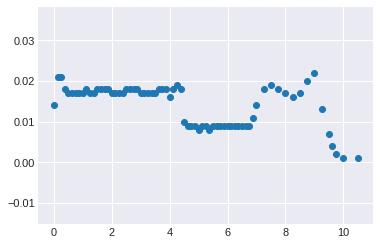

In [24]:
a=[]
b=[]
for (x,_), v in zip(intervals,np.round(sess.run(prob),3)):
    a.append(x);b.append(v)
plt.scatter(a,b)    

In [25]:
zip(intervals,np.round(sess.run(prob),3))

[(array([0.   , 0.125]), 0.014),
 (array([0.125, 0.25 ]), 0.021),
 (array([0.25 , 0.375]), 0.021),
 (array([0.375, 0.5  ]), 0.018),
 (array([0.5  , 0.625]), 0.017),
 (array([0.625, 0.75 ]), 0.017),
 (array([0.75 , 0.875]), 0.017),
 (array([0.875, 1.   ]), 0.017),
 (array([1.   , 1.125]), 0.017),
 (array([1.125, 1.25 ]), 0.018),
 (array([1.25 , 1.375]), 0.017),
 (array([1.375, 1.5  ]), 0.017),
 (array([1.5  , 1.625]), 0.018),
 (array([1.625, 1.75 ]), 0.018),
 (array([1.75 , 1.875]), 0.018),
 (array([1.875, 2.   ]), 0.018),
 (array([2.   , 2.125]), 0.017),
 (array([2.125, 2.25 ]), 0.017),
 (array([2.25 , 2.375]), 0.017),
 (array([2.375, 2.5  ]), 0.017),
 (array([2.5  , 2.625]), 0.018),
 (array([2.625, 2.75 ]), 0.018),
 (array([2.75 , 2.875]), 0.018),
 (array([2.875, 3.   ]), 0.018),
 (array([3.   , 3.125]), 0.017),
 (array([3.125, 3.25 ]), 0.017),
 (array([3.25 , 3.375]), 0.017),
 (array([3.375, 3.5  ]), 0.017),
 (array([3.5  , 3.625]), 0.017),
 (array([3.625, 3.75 ]), 0.018),
 (array([3

In [19]:
sess.run([loss, loss_a,loss-loss_a])

[0.003700509785900244, 0.00013570228669149134, 0.0035648074992087526]

In [20]:
zip(np.round(guessed_prob,3),np.round(sess.run(prob),3))

[(0.009, 0.071),
 (0.025, 0.072),
 (0.041, 0.071),
 (0.058, 0.07),
 (0.074, 0.07),
 (0.09, 0.069),
 (0.107, 0.072),
 (0.11, 0.073),
 (0.093, 0.06),
 (0.08, 0.044),
 (0.072, 0.035),
 (0.064, 0.034),
 (0.056, 0.034),
 (0.048, 0.034),
 (0.04, 0.035),
 (0.032, 0.039),
 (0.039, 0.075),
 (0.008, 0.04),
 (0.0, 0.002)]

In [276]:
zip(np.round(guessed_prob*341,0),np.round(sess.run(prob)*341,0))

[(3.0, 24.0),
 (8.0, 25.0),
 (13.0, 24.0),
 (19.0, 24.0),
 (24.0, 24.0),
 (29.0, 24.0),
 (35.0, 25.0),
 (36.0, 25.0),
 (30.0, 21.0),
 (26.0, 13.0),
 (44.0, 27.0),
 (34.0, 22.0),
 (23.0, 24.0),
 (13.0, 26.0),
 (3.0, 14.0),
 (0.0, 1.0)]

In [26]:
print sess.run([loss, loss_a,loss-loss_a])
zip(np.round(guessed_prob,3),np.round(sess.run(prob),3))

[1.8136868471210973e-05, 1.8136868471210973e-05, 0.0]


[(0.009, 0.072),
 (0.025, 0.073),
 (0.041, 0.066),
 (0.058, 0.075),
 (0.074, 0.063),
 (0.09, 0.079),
 (0.107, 0.067),
 (0.11, 0.06),
 (0.093, 0.085),
 (0.08, 0.028),
 (0.072, 0.039),
 (0.064, 0.034),
 (0.056, 0.034),
 (0.048, 0.035),
 (0.04, 0.041),
 (0.032, 0.016),
 (0.039, 0.101),
 (0.008, 0.029),
 (0.0, 0.003)]

In [27]:
zip(data.values,np.round(np.sum(sess.run(losses0*prob),1),3))

[(array([0.   , 4.017]), 4.019),
 (array([0.5  , 3.555]), 3.555),
 (array([1.   , 3.163]), 3.163),
 (array([1.5  , 2.841]), 2.841),
 (array([2.   , 2.589]), 2.589),
 (array([2.5  , 2.407]), 2.407),
 (array([3.   , 2.295]), 2.295),
 (array([3.5  , 2.257]), 2.257),
 (array([4.   , 2.281]), 2.281),
 (array([4.5  , 2.379]), 2.379),
 (array([5.   , 2.532]), 2.532),
 (array([5.5 , 2.72]), 2.72),
 (array([6.   , 2.943]), 2.943),
 (array([6.5  , 3.201]), 3.201),
 (array([7.   , 3.494]), 3.493),
 (array([7.5  , 3.822]), 3.824),
 (array([8.   , 4.185]), 4.183),
 (array([9.   , 5.017]), 5.018),
 (array([10.   ,  5.982]), 5.984),
 (array([11.   ,  6.982]), 6.981)]

In [22]:

opt = tf.train.AdamOptimizer()
train = opt.minimize(loss)

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

In [23]:
 
for step in xrange(20000):
    sess.run(train)
    if step % 1000 == 0:
        print(step, sess.run(loss))

(0, 11.862384132638901)
(1000, 0.049638894051391304)
(2000, 0.03936586600638623)
(3000, 0.029770841491727165)
(4000, 0.02226454963203544)
(5000, 0.015797216599715284)
(6000, 0.009964448459240794)
(7000, 0.0056219034082124544)
(8000, 0.0030805490932631794)
(9000, 0.0017514221905098695)
(10000, 0.001067735522920026)
(11000, 0.0007088279422359555)
(12000, 0.0004868321082340737)
(13000, 0.00033408341702696406)
(14000, 0.00022456190610629814)
(15000, 0.00014699359642225592)
(16000, 9.57616545978432e-05)
(17000, 6.59684527629232e-05)
(18000, 4.7321782164931215e-05)
(19000, 3.490197526924309e-05)
